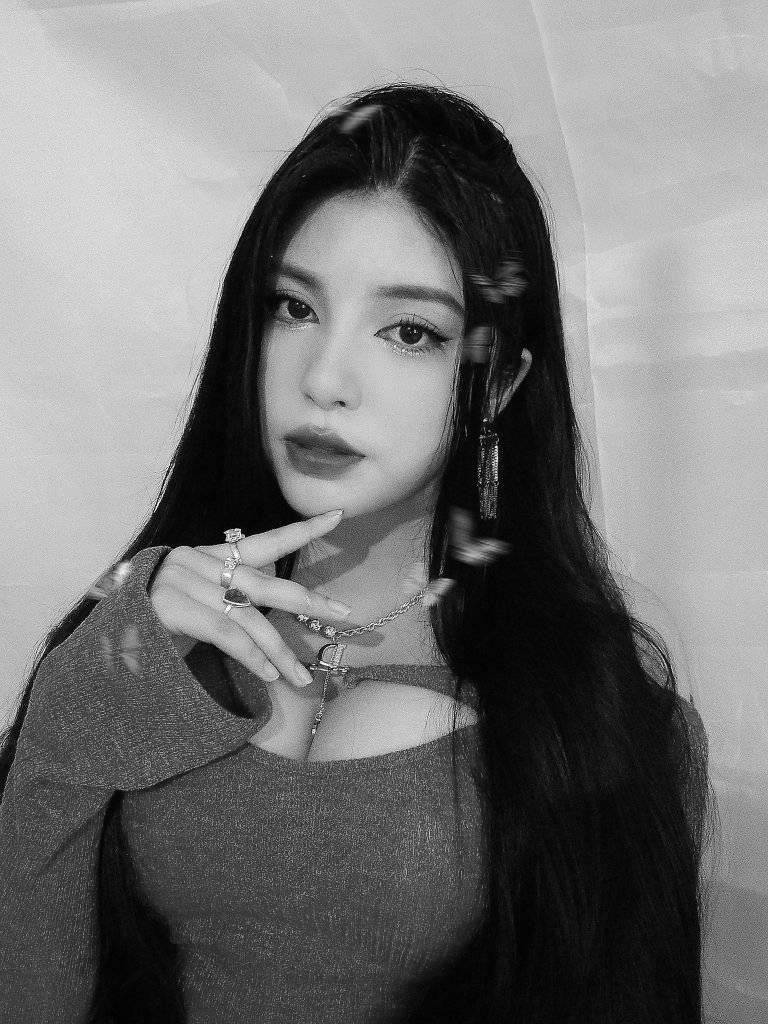

In [155]:
# Cargar las paqueterias necesarias
using Images # Cargar y escribir imagenes
using StatsBase # Operaciones estadísticas básicas
using Plots # Gráficador 

# Cargar imagen #
ruta = "IMG/IM4_gray.jpg"
img = load(ruta)
#img1 = Gray.(img)

In [79]:
# Convertir la imagen a rango de 0 a 255
img1 = round.(Int,Gray.(img).* 255);
# Obtener la tabla de frecuencias de dicha imagen #
tabla = countmap(img1);
# Definir los niveles de 0 a 255 para que se tomen en cuenta todos los valores del rango
niveles = 0:255
# Asegurarse de que todos los niveles estén presentes, incluso con frecuencia 0
tabla1 = Dict(level => get(tabla, level, 0) for level in niveles)
# Ordenar el diccionario
# Descomponer el resultado en 2 vectores
x = collect(keys(tabla1));
y = collect(values(tabla1));
# Ordenar x y obtener los índices de la ordenación
indices = sortperm(x)
# Reordenar x y y según los índices ordenados
x = x[indices]
y = y[indices]


256-element Vector{Int64}:
   217
   156
   367
  1335
  3575
  5759
 10325
 12902
 14514
 13933
 12817
 12103
 11388
     ⋮
     4
     4
     3
     4
     6
     5
     0
     8
     2
     2
     2
     5

In [82]:
# Proyectar el gráfico de barras
# Graficar el histograma
bar(x, y, legend=false, yticks=:auto, yformatter=:plain);

In [104]:
# Calcular las probabillidades 
N = sum(y) # Contabilizar el total de pixeles
pp = y/N; # Obtener la probabilidad de aparición de cada pixel
acum = copy(pp) #Copiar el vector de probabilidades de pixeles para hacer la acumulada
# Acumulador de las probabilidades
for i in 2:size(acum)[1]
    acum[i] = acum[i]+ acum[i-1]     
end


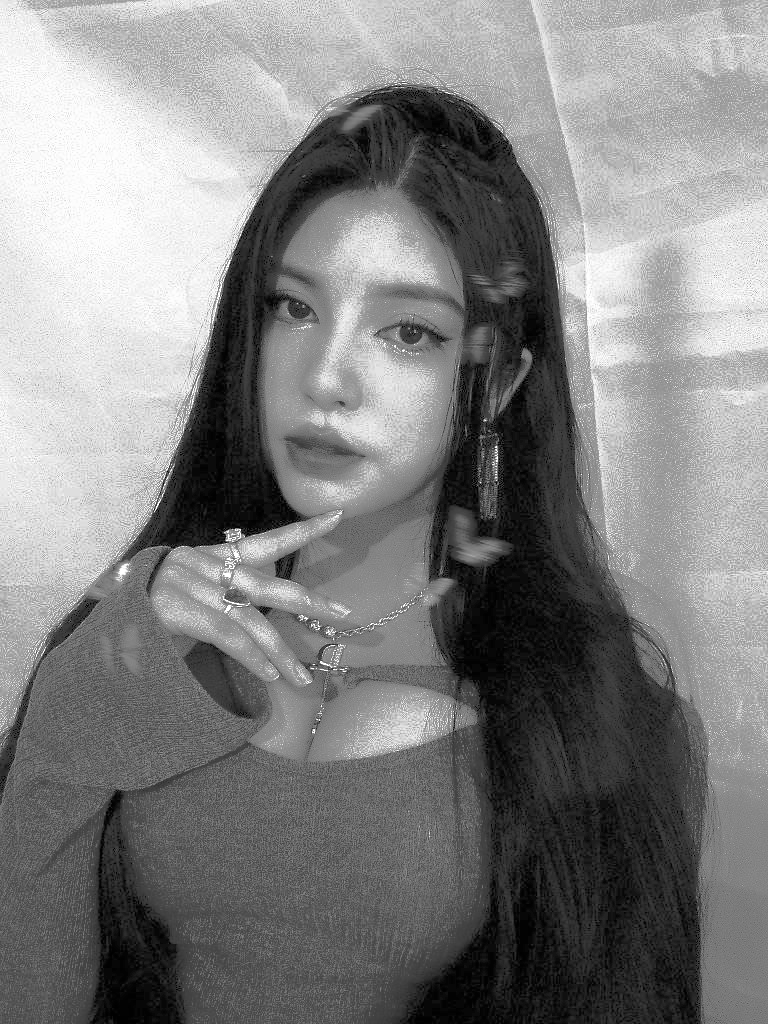

In [154]:
# Usar la probabiidad acumuada para asignar el nuevo vaor de cada pixel:
imgt = vec(img1);
# Versión ajustada #
Fk = round.(255*acum[imgt.+1] )
F0 = minimum(Fk)
salida = round.(255*((Fk.-F0)/(255-F0)))
# Darle el formato original de la matriz #
D = size(img1)
salida = reshape(salida, D[1] , D[2])
#Convertir la matriz a una salida que se rasterice como imagen #
res = clamp.(salida ./ 255, 0, 1)
Gray.(res)

In [183]:
using Plots
using Images
using StatsBase

function ecualizado(img)
    # Convertir la imagen a rango de 0 a 255
    img1 = round.(Int, Gray.(img) .* 255)

    # Obtener la tabla de frecuencias de la imagen original
    tabla = countmap(img1)

    # Definir los niveles de 0 a 255 para que se tomen en cuenta todos los valores del rango
    niveles = 0:255

    # Asegurarse de que todos los niveles estén presentes, incluso con frecuencia 0
    tabla1 = Dict(level => get(tabla, level, 0) for level in niveles)

    # Descomponer el resultado en 2 vectores
    x = collect(keys(tabla1))
    y = collect(values(tabla1))

    # Ordenar x y obtener los índices de la ordenación
    indices = sortperm(x)

    # Reordenar x y y según los índices ordenados
    x = x[indices]
    y = y[indices]

    # Calcular las probabilidades
    N = sum(y)  # Total de píxeles
    pp = y / N  # Probabilidad de aparición de cada píxel

    # Acumulador de las probabilidades
    acum = copy(pp)  # Copiar el vector de probabilidades para hacer la acumulada
    for i in 2:length(acum)
        acum[i] = acum[i] + acum[i - 1]
    end

    # Mostrar el histograma original
    p1 = bar(x, y, label="Histograma Original", legend=:false, 
        xlabel="Valor de píxel", ylabel="Frecuencia",
        title="Histograma de la Imagen Original")

    # Mostrar la distribución acumulada original
    p2 = plot(x, acum, label="Distribución Acumulada Original", legend=:false,
        xlabel="Valor de píxel", ylabel="Probabilidad Acumulada",
        title="Distribución Acumulada de la Imagen Original")

    # Usar la probabilidad acumulada para asignar el nuevo valor de cada píxel
    imgt = vec(img1)

    # Ajuste de los valores de los píxeles
    Fk = round.(255 * acum[imgt .+ 1])  # Fk es el valor ajustado
    F0 = minimum(Fk)  # Valor mínimo ajustado
    salida = round.(255 * ((Fk .- F0) / (255 - F0)))  # Normalizar a [0, 255]

    # Darle el formato original de la matriz
    D = size(img1)
    salida = reshape(salida, D[1], D[2])

    # Convertir la matriz a una salida que se rasterice como imagen
    res = clamp.(salida ./ 255, 0, 1)  # Asegurarse de que los valores estén entre 0 y 1

    # Mostrar el histograma de la imagen ecualizada
    tabla2 = countmap(round.(Int, res .* 255))  # Calcular el histograma de la imagen ecualizada
    tabla2_ordenada = Dict(level => get(tabla2, level, 0) for level in niveles)
    x2 = collect(keys(tabla2_ordenada))
    y2 = collect(values(tabla2_ordenada))

    indices2 = sortperm(x2)
    x2 = x2[indices2]
    y2 = y2[indices2]

    p3 = bar(x2, y2, label="Histograma Ecualizado", legend=:false, xlabel="Valor de píxel", 
        ylabel="Frecuencia", title="Histograma de la Imagen Ecualizada")

    # Calcular la distribución acumulada de la imagen ecualizada
    N2 = sum(y2)
    pp2 = y2 / N2
    acum2 = copy(pp2)
    for i in 2:length(acum2)
        acum2[i] = acum2[i] + acum2[i - 1]
    end

    # Mostrar la distribución acumulada de la imagen ecualizada
    p4 = plot(x2, acum2, label="Distribución Acumulada Ecualizada", legend=:false,
        xlabel="Valor de píxel", ylabel="Probabilidad Acumulada",
        title="Distribución Acumulada de la Imagen Ecualizada")

    # Regresar la imagen ecualizada en formato Gray
    return Gray.(res),p1,p2,p3,p4;
end


ecualizado (generic function with 1 method)

In [188]:
A = ecualizado(img);